# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform, cdist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing the dataset
Over here I looked at the datset and tried to find out what type of dataset it was i.e., whether it was a binary dataset or a regularly distributed dataset as this would affect the data preprocessing steps that I would perform for it.

I checked whether there was any missing values and what types of columns whether they were only integer values

In [2]:
df_X = pd.read_csv("train_X.csv")
df_X.head()

,Unnamed: 0,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000282651,ENSG00000282815,ENSG00000282939,ENSG00000283063,ENSG00000283439,ENSG00000283463,ENSG00000283526,ENSG00000283586,ENSG00000283632,ENSG00000283697
0,EB0D68BC-5FF9-44A5-A355-CA5441BFBA0A,7.062725,0.026623,6.720413,5.449267,3.868619,4.587771,7.165112,4.643161,6.771731,...,0.325987,-5.545564,-5.545564,-5.545564,-5.545564,4.014351,4.841392,-5.545564,5.855893,3.618253
1,0876B4BB-58BA-4C4C-84F4-E9D19EF96147,5.965392,-5.431256,6.358498,4.161479,4.585293,4.326924,6.849703,4.391534,5.819945,...,5.910874,-0.945029,3.750430,1.611211,-0.498573,3.430928,3.160435,-5.431256,4.413930,3.353496
2,EACD1021-7B52-4531-8806-B7555B73AC84,7.892221,-5.851870,8.132992,5.986320,5.422599,4.728815,8.168477,6.289562,7.331591,...,10.103565,-5.851870,6.498217,5.481945,-5.851870,5.137298,4.296777,-5.851870,5.345372,5.028567
3,368ACD26-C7FB-4974-BB7F-0AE22670CB0E,6.826546,0.964851,5.998280,4.991435,4.963000,4.977695,7.149421,4.570863,6.008286,...,2.442099,-5.994056,2.862038,1.909955,0.568120,4.768694,3.983207,-5.994056,4.609411,4.329472
4,F23B0A1A-25AE-41D9-8C49-B692C4FDE1E4,7.059095,2.429954,6.746639,5.591316,5.111120,5.972938,7.576201,6.032083,6.470761,...,5.553223,-5.870484,3.044916,-5.870484,0.018320,4.640575,4.954957,-5.870484,4.620774,4.464277


In [3]:
df_X.describe()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000282651,ENSG00000282815,ENSG00000282939,ENSG00000283063,ENSG00000283439,ENSG00000283463,ENSG00000283526,ENSG00000283586,ENSG00000283632,ENSG00000283697
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,...,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,6.798864,-1.251875,6.867482,5.092604,4.249074,4.951573,7.179084,5.241762,6.152933,4.498626,...,3.650685,-4.019460,2.852973,0.532640,-3.685311,4.131878,3.000574,-5.558757,4.313466,3.944751
std,0.657958,3.487385,0.649468,0.557108,0.974955,1.245837,0.635931,0.803235,0.556726,0.770503,...,3.537927,2.779953,2.558302,3.758160,2.842395,0.743549,2.396337,1.893713,0.798173,0.755219
min,3.865658,-8.167826,3.921938,2.686933,0.635382,1.559740,4.091881,1.961100,3.491674,0.877428,...,-8.025671,-8.093499,-7.791345,-7.821501,-8.093499,1.289553,-7.174879,-8.167826,-0.430043,0.899681
25%,6.447793,-5.483300,6.546906,4.765809,3.630805,4.075300,6.844709,4.783474,5.828785,4.045615,...,2.240973,-5.966191,2.295934,-0.131155,-5.899284,3.706238,1.768129,-6.599244,3.882128,3.511135
50%,6.852772,0.213298,6.938184,5.093077,4.238058,4.896219,7.207127,5.155404,6.157952,4.492328,...,4.101297,-5.425883,3.333111,1.984213,-5.168411,4.119857,3.473621,-5.861161,4.348660,3.944781
75%,7.226415,1.184977,7.269660,5.435893,4.935047,5.948701,7.594792,5.664817,6.468815,4.950106,...,5.794548,-1.497067,4.331129,3.146919,-0.619910,4.611680,4.724469,-5.445569,4.810073,4.425701
max,8.642886,9.451403,8.598549,6.988089,7.650225,8.220311,8.916491,8.810685,7.702358,7.233636,...,12.370689,5.137566,7.188701,7.083282,2.026253,6.738504,7.181350,1.982121,6.661020,6.684243


In [4]:
len(df_X.columns)

17971

In [5]:
only1 = []
for k in df_X.columns:
    if df_X[k].nunique() != df_X.shape[0]:
        only1.append(df_X[k].nunique())        

In [6]:
df_y = pd.read_csv("train_y.csv")
df_y.head()

,Unnamed: 0,xml_neoplasm_histologic_grade
0,EB0D68BC-5FF9-44A5-A355-CA5441BFBA0A,0
1,0876B4BB-58BA-4C4C-84F4-E9D19EF96147,1
2,EACD1021-7B52-4531-8806-B7555B73AC84,0
3,368ACD26-C7FB-4974-BB7F-0AE22670CB0E,0
4,F23B0A1A-25AE-41D9-8C49-B692C4FDE1E4,1


In [7]:
df = pd.merge(df_X, df_y)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Columns: 17972 entries, Unnamed: 0 to xml_neoplasm_histologic_grade
dtypes: float64(17970), int64(1), object(1)
memory usage: 60.9+ MB


Null values

In [8]:
for i in df.columns:
    if df[i].isna().sum()!=0:
        print(i,df[i].isna().sum())

In [9]:
df.head()

,Unnamed: 0,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000282815,ENSG00000282939,ENSG00000283063,ENSG00000283439,ENSG00000283463,ENSG00000283526,ENSG00000283586,ENSG00000283632,ENSG00000283697,xml_neoplasm_histologic_grade
0,EB0D68BC-5FF9-44A5-A355-CA5441BFBA0A,7.062725,0.026623,6.720413,5.449267,3.868619,4.587771,7.165112,4.643161,6.771731,...,-5.545564,-5.545564,-5.545564,-5.545564,4.014351,4.841392,-5.545564,5.855893,3.618253,0
1,0876B4BB-58BA-4C4C-84F4-E9D19EF96147,5.965392,-5.431256,6.358498,4.161479,4.585293,4.326924,6.849703,4.391534,5.819945,...,-0.945029,3.750430,1.611211,-0.498573,3.430928,3.160435,-5.431256,4.413930,3.353496,1
2,EACD1021-7B52-4531-8806-B7555B73AC84,7.892221,-5.851870,8.132992,5.986320,5.422599,4.728815,8.168477,6.289562,7.331591,...,-5.851870,6.498217,5.481945,-5.851870,5.137298,4.296777,-5.851870,5.345372,5.028567,0
3,368ACD26-C7FB-4974-BB7F-0AE22670CB0E,6.826546,0.964851,5.998280,4.991435,4.963000,4.977695,7.149421,4.570863,6.008286,...,-5.994056,2.862038,1.909955,0.568120,4.768694,3.983207,-5.994056,4.609411,4.329472,0
4,F23B0A1A-25AE-41D9-8C49-B692C4FDE1E4,7.059095,2.429954,6.746639,5.591316,5.111120,5.972938,7.576201,6.032083,6.470761,...,-5.870484,3.044916,-5.870484,0.018320,4.640575,4.954957,-5.870484,4.620774,4.464277,1


In [10]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Columns: 17971 entries, Unnamed: 0 to ENSG00000283697
dtypes: float64(17970), object(1)
memory usage: 60.9+ MB


<Axes: >

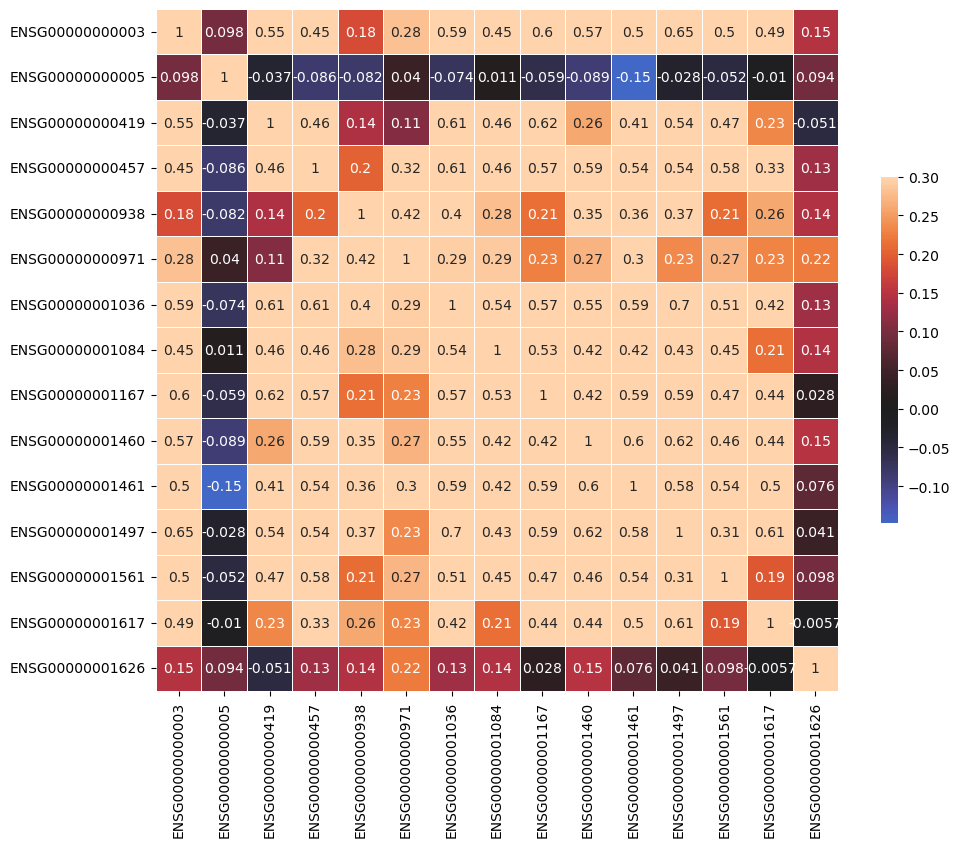

In [11]:
# Compute the correlation matrix
corr = df.iloc[:, 1:16].corr()

# Generate a mask for the upper triangle

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(130, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.iloc[:, 1:16].corr(), vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [12]:
a = {"Column1": list(), "Column2": list(), "Correlation value": list()}
for i in list(corr.columns):
    for j in range(list(corr.columns).index(i)+1, len(corr[i])):
        if corr[i][j]>0.7:
            a["Column1"].append(i)
            a["Column2"].append(corr.columns[j])
            a["Correlation value"].append(corr[i][j])

In [13]:
a

{'Column1': [], 'Column2': [], 'Correlation value': []}

In [16]:
df_y.head()

,Unnamed: 0,xml_neoplasm_histologic_grade
0,EB0D68BC-5FF9-44A5-A355-CA5441BFBA0A,0
1,0876B4BB-58BA-4C4C-84F4-E9D19EF96147,1
2,EACD1021-7B52-4531-8806-B7555B73AC84,0
3,368ACD26-C7FB-4974-BB7F-0AE22670CB0E,0
4,F23B0A1A-25AE-41D9-8C49-B692C4FDE1E4,1


In [17]:
y = df_y["xml_neoplasm_histologic_grade"]

In [18]:
df_X = df_X.drop("Unnamed: 0", axis = 1)

KeyError: "['Unnamed: 0'] not found in axis"

Scaling my data, splitting my data as well as performing Random Forest Classifier. The reason why I chose Random Forest instead of decision tree is because of the fact that random forest classifier is more accurate and has a loweer likelihood of overfitting the data. 

In [48]:
scaler = StandardScaler().fit(df_X)
X_scaled = scaler.transform(df_X)
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size = 0.2, stratify=y, random_state = 42)

In [50]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
y_pred = clf.predict(X_test)

In [52]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8426966292134831


I then found at the best sport for performing kmeans to fins the best number of clusters for KNearestNeighbours. This is because KNN is basically a supervised version of KMeans. Where Kmeans does not know what you are predicting the KNearest Neighbours knows what you are predicting.  

In [54]:
inertias = []
distortions = []
k_range = range(1, 25)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(X_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])

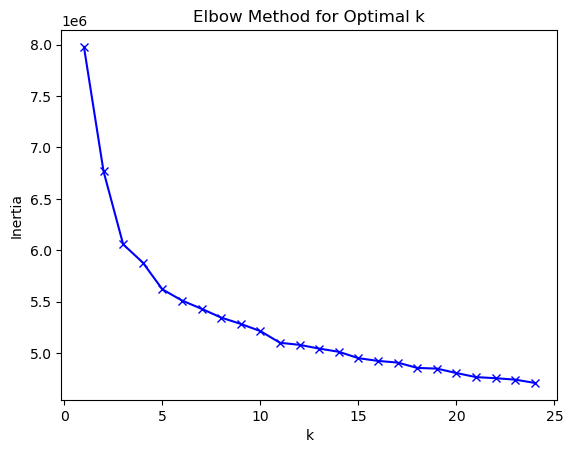

In [55]:
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [56]:
clf = KNeighborsClassifier(n_neighbors=185)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7752808988764045

I then used a Multi-Layer Perceptron to figure out the accuracy that would be obtained if the data is put in through an MLP (despite this not being taught I thought that it was a free for all so I decided to use one of the classifiers). I tried it with different solvers learning rates alphas and hidden layer size. But the best value from my outcomes was this. lbfgs is a type of optimizer which stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm. It basically starts with an initial estimate ad works to get a better estimate with time. An adaptive learning rate basically 

In [57]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, verbose = True,learning_rate ="adaptive", early_stopping = True, hidden_layer_sizes=( 5, 2), random_state=1, activation  = "logistic", max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8426966292134831

In [58]:
clf = SVC()
clf.fit(X_train, y_train).score(X_test, y_test)

0.8089887640449438

In [59]:
svc = SVC(probability=True, gamma="auto")
clf = SelfTrainingClassifier(svc)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [60]:
accuracy_score(y_test, y_pred)

0.8089887640449438

In [61]:
estimators = [
    ('lr', LogisticRegression()),
    ("MLP", MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)),
    ('kn', KNeighborsClassifier(n_neighbors=185)),
    ('rf', RandomForestClassifier(n_estimators=1000)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC())),
    ('svm', SVC())
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

In [62]:
clf.fit(X_train, y_train).score(X_test, y_test)

0.8202247191011236

In [36]:
X_te = pd.read_csv("test_X.csv")
Id = X_te["Unnamed: 0"]

In [37]:
Id

0      1576BB97-F8EA-48FF-9494-EBC7A0C97312
1      63F4281A-4D90-4589-879E-549097FB3459
2      74CF740D-201D-4070-99B9-F007E7C4D472
3      1329E1C1-743E-4541-9081-165572D4BF47
4      88BBA1BF-44E0-416E-A028-04F410A3FE5D
                       ...                 
105    638A0BBA-E2BE-449C-8BF5-EC07F765200C
106    FD3BD018-3B83-4689-BC70-CE6E98F83790
107    739BEBEA-F6CC-4827-81D4-28102A8B774B
108    5F86DB7A-1906-4E2F-BD50-0AEE3C80B17D
109    536FEED2-6251-41BC-AA61-EA46744EAB05
Name: Unnamed: 0, Length: 110, dtype: object

In [38]:
X_te = X_te.drop("Unnamed: 0", axis = 1)

In [39]:
scaler.transform(X_te)

array([[ 1.07268266,  0.84321858,  1.88459749, ..., -0.90903316,
         0.66518389,  0.47471871],
       [-1.04371207, -1.19823592, -1.94646088, ...,  0.07024857,
        -0.26048401,  1.13817841],
       [-0.93579102,  0.70884478, -1.19243953, ...,  0.15805579,
         1.00998948,  1.43196327],
       ...,
       [ 0.51267209,  0.49691225,  0.2835797 , ..., -0.21236154,
         1.2116688 , -0.1734665 ],
       [ 0.09246812,  0.97938416,  0.59732939, ...,  0.00302569,
         1.51794145,  0.19090643],
       [-0.40564732,  0.64395552, -1.01815776, ...,  0.0166635 ,
        -0.89433127, -0.84612184]])

In [40]:
y_tes = clf.predict(X_te)

In [41]:
a = {"ID": Id, "xml_neoplasm_histologic_grade": y_tes}

In [42]:
j = pd.DataFrame(data = a, index = None)

In [43]:
j.to_csv("Solution.csv")

In [44]:
j

,ID,xml_neoplasm_histologic_grade
0,1576BB97-F8EA-48FF-9494-EBC7A0C97312,1
1,63F4281A-4D90-4589-879E-549097FB3459,0
2,74CF740D-201D-4070-99B9-F007E7C4D472,1
3,1329E1C1-743E-4541-9081-165572D4BF47,1
4,88BBA1BF-44E0-416E-A028-04F410A3FE5D,0
...,...,...
105,638A0BBA-E2BE-449C-8BF5-EC07F765200C,1
106,FD3BD018-3B83-4689-BC70-CE6E98F83790,0
107,739BEBEA-F6CC-4827-81D4-28102A8B774B,0
108,5F86DB7A-1906-4E2F-BD50-0AEE3C80B17D,1


In [45]:
j.shape

(110, 2)